In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


 importing numpy and pandas

In [2]:
df = pd.read_csv('AirQualityUCI/AirQuality.csv')

reading csv file

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


showing few data of csv file

In [4]:
df.replace(to_replace = -200 , value = np.nan , inplace = True)

As csv contain "-200" as null value then replacing it "Null"

In [5]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

ANalysing null values

In [31]:
df.shape

(9357, 15)

In [6]:
df = df.drop(["NMHC(GT)"],axis = 1)

Dropping not required data

In [33]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [44]:
df['Date'].dtypes == 'O'

True

In [9]:
for i in df.columns:
    if df[i].dtypes == 'O':
        continue
    else:
        pass
        temp_mean = np.mean(df[i])
        df[i].fillna(temp_mean , inplace=True)
    

Replacing null values with mean value

In [10]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
for i in df.columns:
    if df[i].dtypes == 'O':
        continue
    else:
        temp_mean = np.mean(df[i])
        std_dev = np.std(df[i])
        for j in range(len(df[i])):
            df[i][j] = abs(df[i][j] - temp_mean)/std_dev
        

/home/samy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
Normalizing the data to make it unit free as measurementunit is different

SyntaxError: invalid syntax (<ipython-input-49-fa26945d331e>, line 1)

In [12]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,0.536910,1.006496,0.292523,0.450552,0.175129,0.845816,0.321332,0.663058,0.650849,0.427618,0.081731,0.513874
1,3/10/2004,19:00:00,0.150855,0.780755,0.038191,0.164999,0.468177,1.240017,0.020261,0.361768,0.024872,0.459678,0.020109,0.586796
2,3/10/2004,20:00:00,0.279540,1.145924,0.091106,0.114791,0.337934,1.126434,0.337599,0.352707,0.207978,0.609295,0.343625,0.531032
3,3/10/2004,21:00:00,0.279540,1.059611,0.064649,0.143033,0.147220,0.966081,0.467730,0.418402,0.502465,0.705477,0.651735,0.448629
4,3/10/2004,22:00:00,0.106516,0.714360,0.421821,0.208417,0.337934,1.343578,0.370132,0.205460,0.290160,0.684103,0.631194,0.443888


Data is prepared for modelling

In [13]:
df.to_csv('AirQualityUCI/normalized_airQuality.csv')
df.to_csv('AirQualityUCI/normalized_airQuality.xlsx')

In [14]:
df1 = pd.read_csv('AirQualityUCI/normalized_airQuality.csv')

In [15]:
df1.head()

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,3/10/2004,18:00:00,0.536910,1.006496,0.292523,0.450552,0.175129,0.845816,0.321332,0.663058,0.650849,0.427618,0.081731,0.513874
1,1,3/10/2004,19:00:00,0.150855,0.780755,0.038191,0.164999,0.468177,1.240017,0.020261,0.361768,0.024872,0.459678,0.020109,0.586796
2,2,3/10/2004,20:00:00,0.279540,1.145924,0.091106,0.114791,0.337934,1.126434,0.337599,0.352707,0.207978,0.609295,0.343625,0.531032
3,3,3/10/2004,21:00:00,0.279540,1.059611,0.064649,0.143033,0.147220,0.966081,0.467730,0.418402,0.502465,0.705477,0.651735,0.448629
4,4,3/10/2004,22:00:00,0.106516,0.714360,0.421821,0.208417,0.337934,1.343578,0.370132,0.205460,0.290160,0.684103,0.631194,0.443888


In [54]:
storing normalized data into csv file and excel file


SyntaxError: invalid syntax (<ipython-input-54-510d7edf7869>, line 1)

In [16]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [17]:
df.shape

(9357, 14)

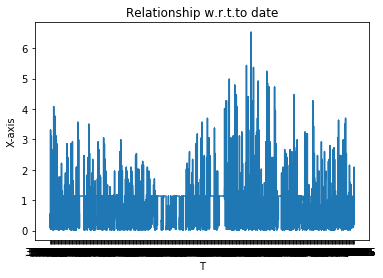

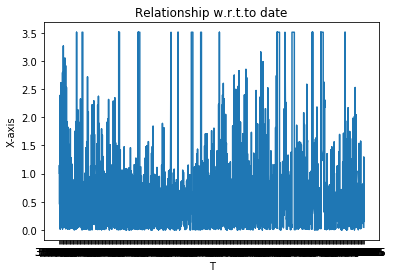

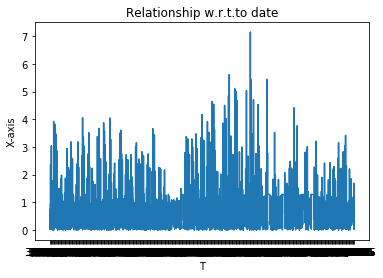

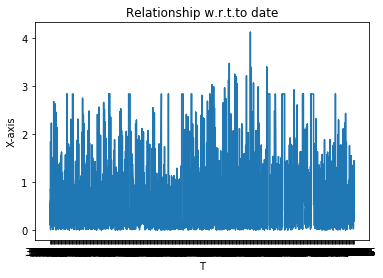

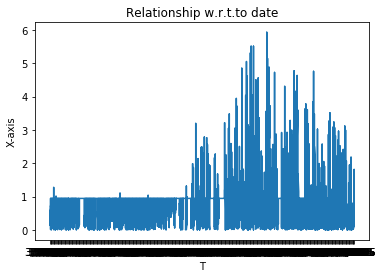

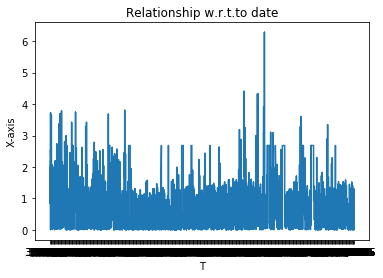

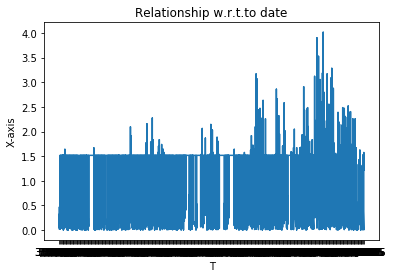

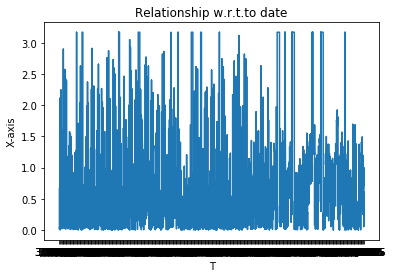

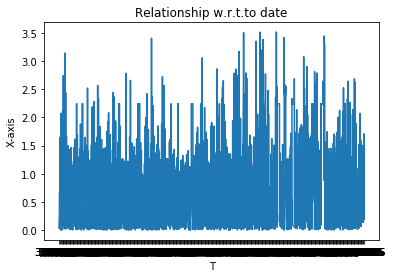

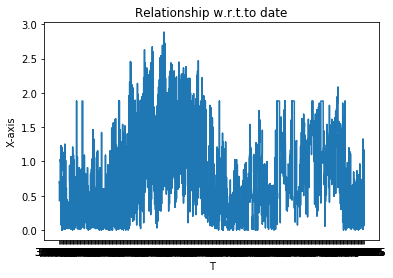

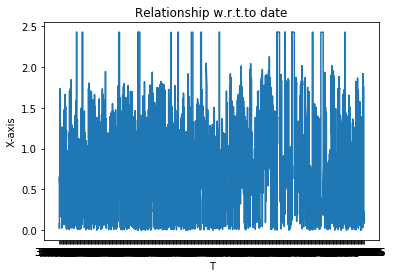

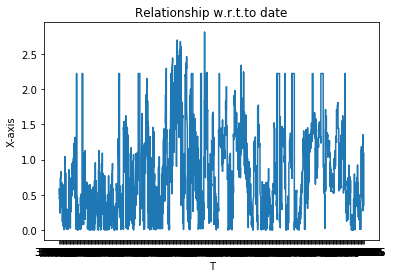

In [18]:
for i in df.columns:
    if df[i].dtypes == 'O':
        continue
    else:
        y = df[i]
        x = df['Date']
        plt.plot(x,y)
        plt.title('Relationship w.r.t.to date')
        plt.ylabel('X-axis')
        plt.xlabel('T')
        plt.show()

In [26]:
import math

print(((2/5)*math.log((2/5))))

-0.366516292749662


In [27]:
print(0.3064+0.3665)

0.6729


In [28]:
print((5/7)*0.6729)

0.4806428571428572


In [10]:
print(0.5*0.41)

0.205


In [23]:
print(0.2857+0.2725+0.16042)

0.71862


In [29]:
print(0.940-0.4806)

0.4593999999999999
